In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

code from https://github.com/BME-SmartLab-Education/vitmav45/blob/master/06/CNN-transfer-learning-Keras.ipynb

imageset downloader code from https://towardsdatascience.com/downloading-openimages-dataset-in-google-drive-using-colab-132502f0dbde

I downloaded a lot of images from 3 classes. So I must to reduce the amount of images to 400-100-100 (train-valid-test). Therefore I created data_modified folder, where are only 400-100-100 images.

In [2]:
base_dir = 'data_modified/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_sink_dir = os.path.join(train_dir, 'Sink')
train_toilet_dir = os.path.join(train_dir, 'Toilet')
train_laptop_dir = os.path.join(train_dir, 'Laptop')
validation_sink_dir = os.path.join(validation_dir, 'Sink')
validation_toilet_dir = os.path.join(validation_dir, 'Toilet')
validation_laptop_dir = os.path.join(validation_dir, 'Laptop')
test_sink_dir = os.path.join(test_dir, 'Sink')
test_toilet_dir = os.path.join(test_dir, 'Toilet')
test_laptop_dir = os.path.join(test_dir, 'Laptop')

In [3]:
train_sink_filenames = os.listdir(train_sink_dir)
print('\nThere are:',len(train_sink_filenames), 'train SINK train image')
train_toilet_filenames = os.listdir(train_toilet_dir)
print('There are:',len(train_toilet_filenames), 'train TOILET train image')
train_laptop_filenames = os.listdir(train_laptop_dir)
print('There are:',len(train_laptop_filenames), 'train LAPTOP train image')
## - ##
valid_sink_filenames = os.listdir(validation_sink_dir)
print('\nThere are:',len(valid_sink_filenames), 'train SINK valid image')
valid_toilet_filenames = os.listdir(validation_toilet_dir)
print('There are:',len(valid_toilet_filenames), 'train TOILET valid image')
valid_laptop_filenames = os.listdir(validation_laptop_dir)
print('There are:',len(valid_laptop_filenames), 'train LAPTOP valid image')
## - ##    
test_sink_filenames = os.listdir(test_sink_dir)
print('\nThere are:',len(test_sink_filenames), 'train SINK test image')
test_toilet_filenames = os.listdir(test_toilet_dir)
print('There are:',len(test_toilet_filenames), 'train TOILET test image')
test_laptop_filenames = os.listdir(test_laptop_dir)
print('There are:',len(test_laptop_filenames), 'train LAPTOP test image')



There are: 400 train SINK train image
There are: 400 train TOILET train image
There are: 400 train LAPTOP train image

There are: 100 train SINK valid image
There are: 100 train TOILET valid image
There are: 100 train LAPTOP valid image

There are: 100 train SINK test image
There are: 100 train TOILET test image
There are: 100 train LAPTOP test image


In [4]:
train_sink_filenames = os.listdir(train_sink_dir)
print(train_sink_filenames[:10])

train_toilet_filenames = os.listdir(train_toilet_dir)
train_toilet_filenames.sort()
print(train_toilet_filenames[:10])

train_laptop_filenames = os.listdir(train_laptop_dir)
print(train_laptop_filenames[:10])

['00078efdcdc41cbe.jpg', '0015e1542758b654.jpg', '0016e05dce46eae4.jpg', '0023dce3438b89c5.jpg', '004a873dcb14de28.jpg', '004ccb5669b648ab.jpg', '005e405f08ed3c23.jpg', '006ed074e8b9f846.jpg', '007db7e01f3941d2.jpg', '007f3f0b36751fbe.jpg']
['000a0945ecb24c23.jpg', '0016e05dce46eae4.jpg', '0022e09775235001.jpg', '0047c6c592589a92.jpg', '004d733b210847f8.jpg', '00994251114b0997.jpg', '00a60d051d75144f.jpg', '00b8c7642d98fedf.jpg', '00bf3b7340ae0a9f.jpg', '00c0b0f3b76ce0aa.jpg']
['0002af997ecdfcf4.jpg', '002a604d484c81f7.jpg', '002a7f5f38b19e2f.jpg', '002acb2b40914c80.jpg', '002b14ed6cafe347.jpg', '002b3b1e21a24ef5.jpg', '002b7b3e25072636.jpg', '003a51484fdfe6ec.jpg', '003a5a5793a085d3.jpg', '003cabf44cf6119f.jpg']


So I have valid images

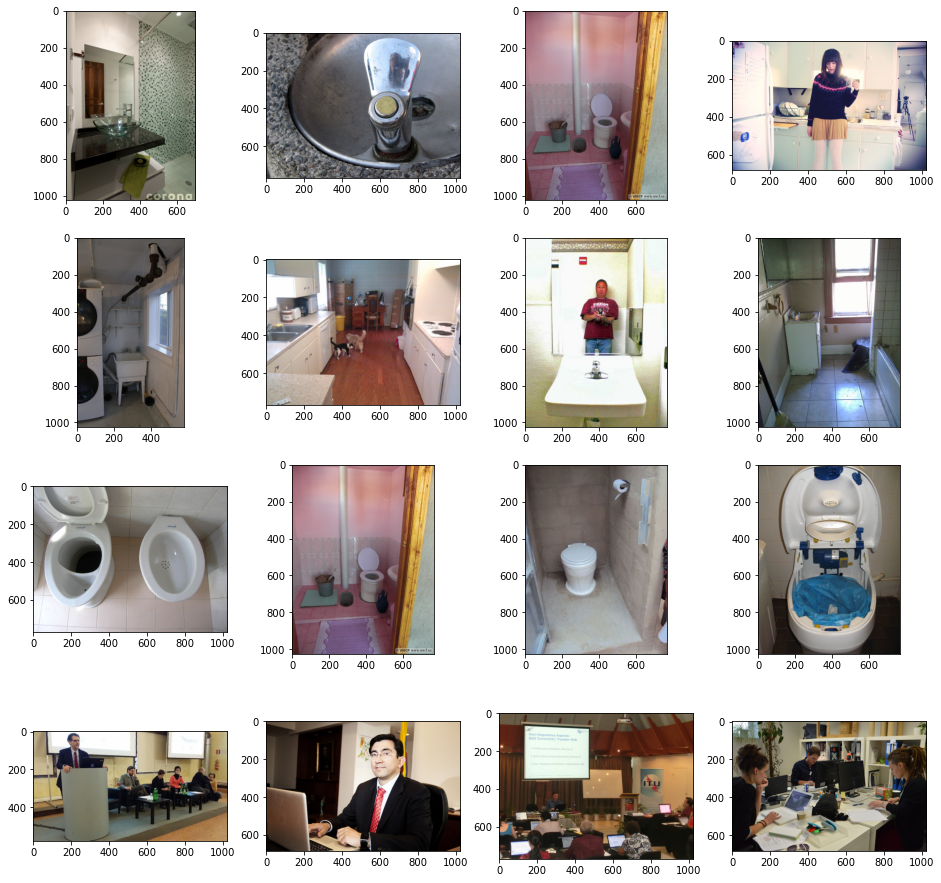

In [5]:
#there is some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_sink_pix = [os.path.join(train_sink_dir, fname) for fname in train_sink_filenames[:int(ncols*nrows/2)]]
next_toilet_pix = [os.path.join(train_toilet_dir, fname) for fname in train_toilet_filenames[:int(ncols*nrows/4)]]
next_laptop_pix = [os.path.join(train_laptop_dir, fname) for fname in train_laptop_filenames[:int(ncols*nrows/4)]]

for i, img_path in enumerate(next_sink_pix+next_toilet_pix+next_laptop_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Training

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [7]:
img_height=299
img_width=299

In [8]:
# lead a pretrained model (InceptionV3)
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='sigmoid')(x)
#add some layers, and a Dense layer, with 3 neuron, because we have 3 classes
model = Model(inputs=base_model.input, outputs=predictions)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
for layer in base_model.layers:
    layer.trainable = False

# makeing layers untrainable
# then compile the model, with loss=categorical_crossentropy, because we have 3 classes
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')

In [10]:
# making the datagenerators for train,valid and test data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=20, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(img_height, img_width), batch_size=20, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=20, class_mode='categorical')

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [11]:
# fitting the train_generators
model.fit_generator(train_generator,steps_per_epoch=200,validation_data=validation_generator,validation_steps=10,epochs=3)

Epoch 1/3
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
200/200 [==============================] - 763s 4s/step - loss: 0.8131 - acc: 0.4132 - val_loss: 0.7198 - val_acc: 0.4800
Epoch 2/3
200/200 [==============================] - 765s 4s/step - loss: 0.7439 - acc: 0.3823 - val_loss: 0.6721 - val_acc: 0.5300
Epoch 3/3
200/200 [==============================] - 769s 4s/step - loss: 0.7045 - acc: 0.5805 - val_loss: 0.4501 - val_acc: 0.6950


In [12]:
model.evaluate_generator(test_generator)
print('The Accuracy is:', model.evaluate_generator(test_generator)[1])

The Accuracy is: 0.6666667


In [13]:
print("Convolutional layers of the Inception V3:")
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

Convolutional layers of the Inception V3:
0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_no

In [14]:
# we have more trainable layers
for layer in model.layers[:172]:
       layer.trainable = False
for layer in model.layers[172:]:
       layer.trainable = True

In [15]:
# compile again
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'], loss='categorical_crossentropy')

In [16]:
# fitting again
model.fit_generator(train_generator,steps_per_epoch=200,validation_data=validation_generator,validation_steps=10,epochs=4)
print("Tanítás vége.")

Epoch 1/4
200/200 [==============================] - 1206s 6s/step - loss: 0.4579 - acc: 0.6628 - val_loss: 0.4294 - val_acc: 0.7050
Epoch 2/4
200/200 [==============================] - 1204s 6s/step - loss: 0.4264 - acc: 0.6740 - val_loss: 0.4182 - val_acc: 0.7050
Epoch 3/4
200/200 [==============================] - 1198s 6s/step - loss: 0.3933 - acc: 0.6750 - val_loss: 0.4046 - val_acc: 0.7050
Epoch 4/4
200/200 [==============================] - 1202s 6s/step - loss: 0.3677 - acc: 0.6827 - val_loss: 0.3938 - val_acc: 0.7150
Tanítás vége.


In [17]:
model.evaluate_generator(test_generator)
print('The Accuracy is:', model.evaluate_generator(test_generator)[1])

The Accuracy is: 0.6766667
